In [1]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from load_cppimg import load_img
import re
%matplotlib inline

path = '../exp_result/'
exp_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
exp_folders.sort(key=lambda x: int(re.search(r'\d+', x).group()))
print("\n".join(exp_folders))

ID0_Speed_min0.0_max0.0189873417721519
ID1_Speed_min0.020253164556962026_max0.039240506329113925
ID2_Speed_min0.04050632911392405_max0.05949367088607595
ID3_Speed_min0.06075949367088608_max0.07974683544303797
ID4_Speed_min0.0810126582278481_max0.1


ID0_Speed_min0.0_max0.0189873417721519


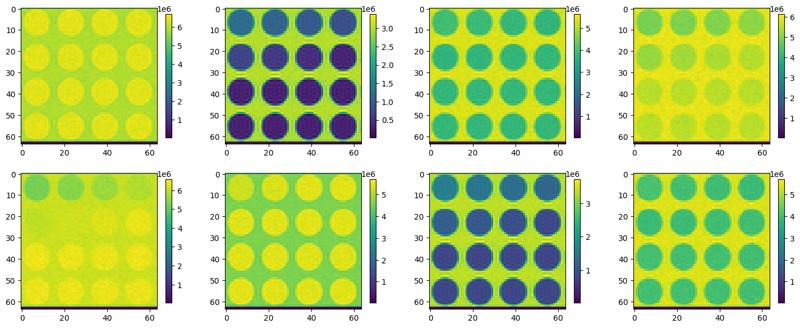

ID1_Speed_min0.020253164556962026_max0.039240506329113925


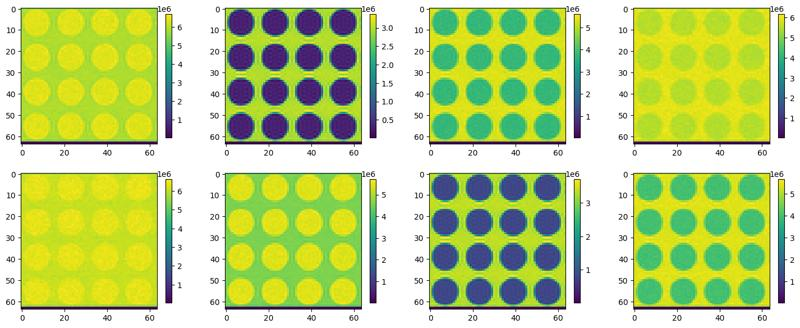

ID2_Speed_min0.04050632911392405_max0.05949367088607595


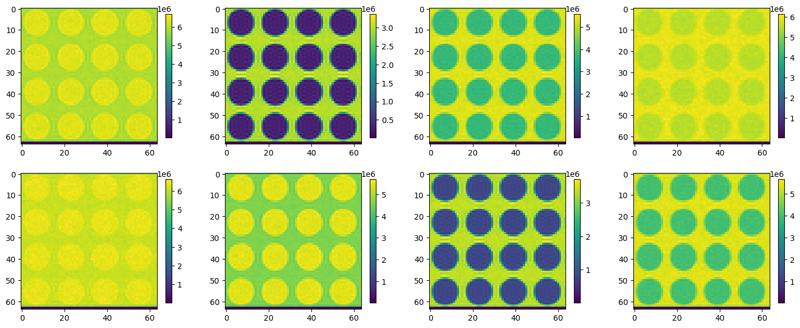

ID3_Speed_min0.06075949367088608_max0.07974683544303797


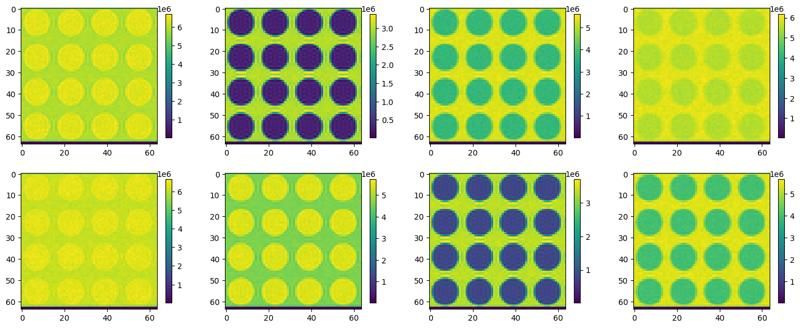

ID4_Speed_min0.0810126582278481_max0.1


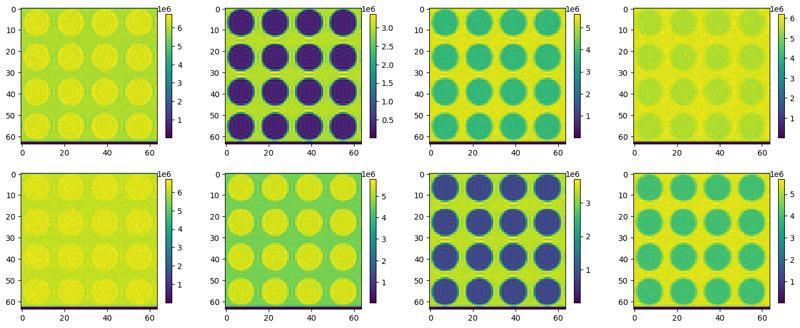

In [2]:
for exp in exp_folders:
    
    MOLLI_readout_img=[]
    for i in range(8):
        MOLLI_readout_img.append(load_img(os.path.join(path, exp),i))
    MOLLI_readout_img=np.asarray(MOLLI_readout_img)
    plt.figure(figsize=(18,7))
    print(exp)
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(MOLLI_readout_img[i])
        plt.colorbar(shrink=0.9)
    plt.show()